In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Algerian_forest_fires_dataset.csv')

In [3]:
data.head() 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


# Data Cleaning 

In [5]:
data[data.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [6]:
data.loc[:122, "Region"]=0
data.loc[122:, "Region"]=1

In [7]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [8]:
data[["Region"]] = data[["Region"]].astype(int)

In [9]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [10]:
data.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [11]:
data= data.dropna().reset_index(drop=True)

In [12]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [13]:
data.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [14]:
data = data.drop(122).reset_index(drop=True)

In [15]:
data.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [16]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [17]:
data.columns=data.columns.str.strip()
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [19]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [20]:
data[['day','month','year','Temperature','RH','Ws']]= data[['day','month','year','Temperature','RH','Ws']].astype(int)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [22]:
data[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']]= data[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [24]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [25]:
data.to_csv('Cleaned Forest Fire Dataset.csv', index=False)

In [26]:
df= data.drop(['day','month','year'],axis=1)

In [27]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [28]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [29]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [30]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [31]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [32]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

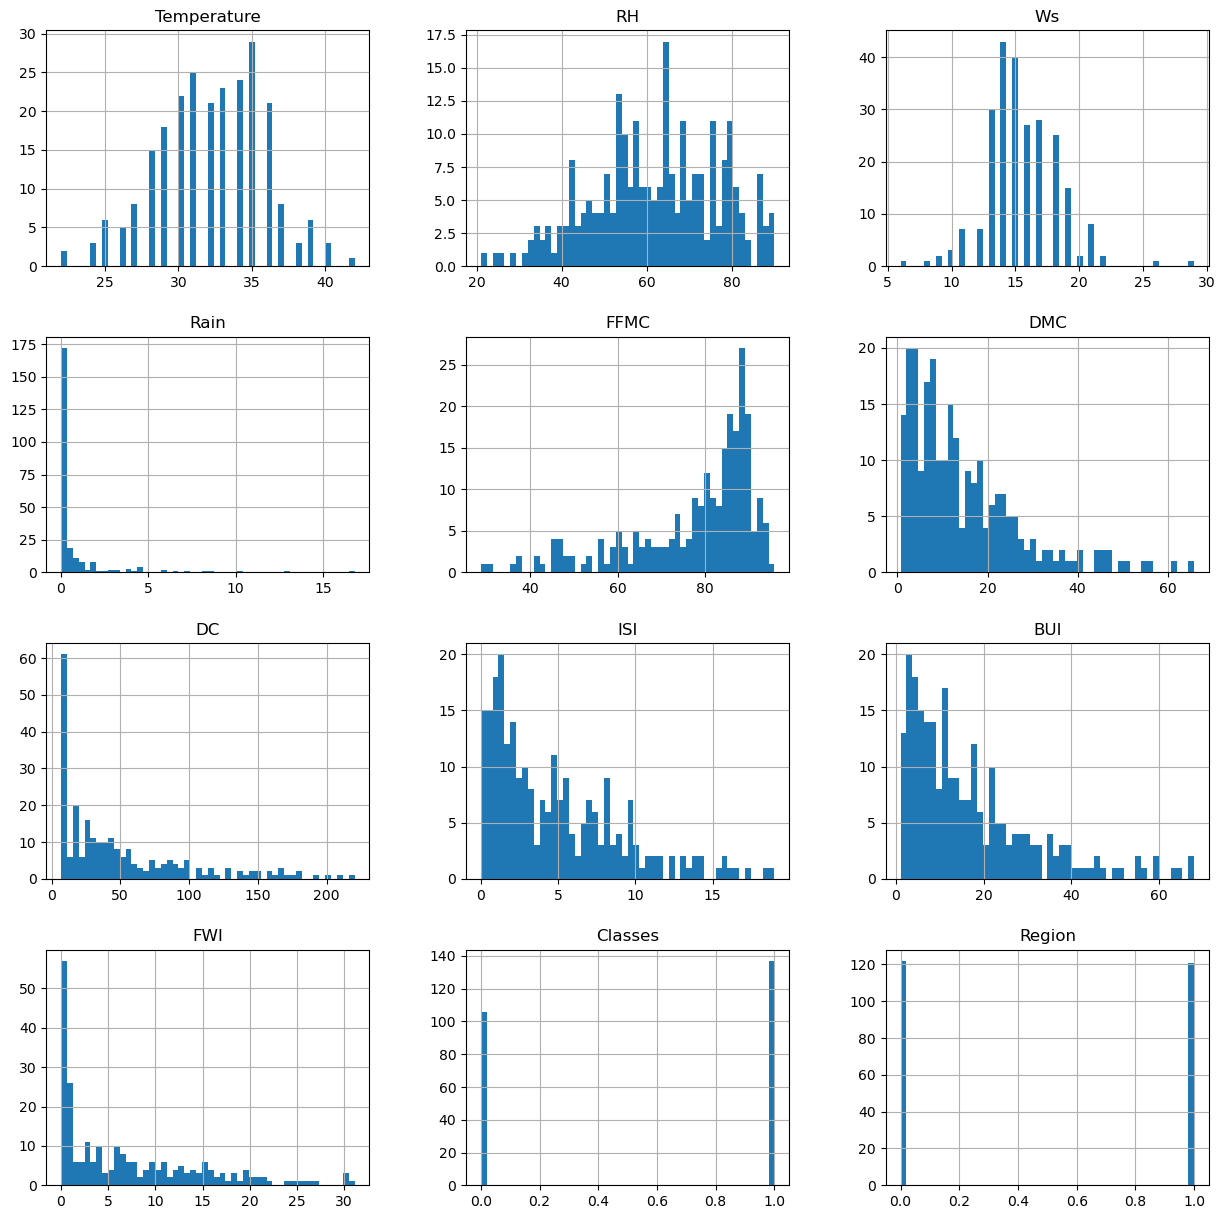

In [33]:
df.hist(bins=50, figsize=(15,15))
plt.show()

In [34]:
perc = df['Classes'].value_counts(normalize=True)*100

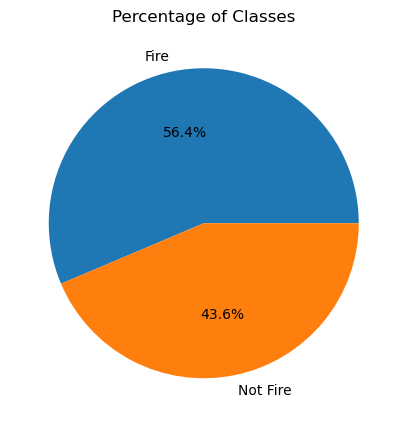

In [35]:
classlabels=['Fire','Not Fire']
plt.figure(figsize=(5,10))
plt.pie(perc, labels=classlabels, autopct='%1.1f%%')
plt.title("Percentage of Classes")
plt.show()

In [36]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

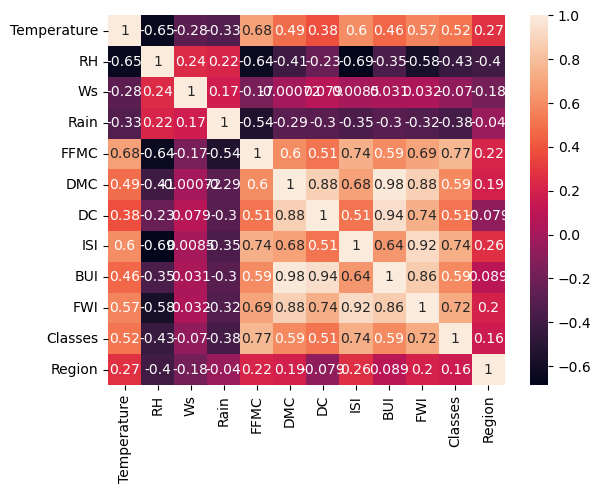

In [37]:
sns.heatmap(df.corr(), annot=True)

## Spliting Dataset into Training and Testing Data

In [38]:
## Splting data into dependent and independent features 
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [39]:
X = df.drop('FWI', axis=1)
y = df['FWI']

In [40]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.30,random_state=10)

In [42]:
X_train.shape,X_test.shape

((170, 11), (73, 11))

In [43]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.667347,-0.321890,-0.357337,0.676899,0.467457,0.372405,0.585021,0.446250,0.536660,0.262987
RH,-0.667347,1.000000,0.184884,0.209628,-0.653689,-0.412038,-0.243996,-0.703338,-0.362633,-0.461674,-0.376615
Ws,-0.321890,0.184884,1.000000,0.048375,-0.142394,0.029160,0.078912,0.041894,0.052275,-0.073360,-0.160627
Rain,-0.357337,0.209628,0.048375,1.000000,-0.572752,-0.333955,-0.320449,-0.374307,-0.339443,-0.396976,-0.009934
FFMC,0.676899,-0.653689,-0.142394,-0.572752,1.000000,0.606680,0.508194,0.733106,0.593917,0.764685,0.235845
DMC,0.467457,-0.412038,0.029160,-0.333955,0.606680,1.000000,0.882752,0.680822,0.982292,0.588164,0.155615
DC,0.372405,-0.243996,0.078912,-0.320449,0.508194,0.882752,1.000000,0.517882,0.943613,0.489072,-0.103702
ISI,0.585021,-0.703338,0.041894,-0.374307,0.733106,0.680822,0.517882,1.000000,0.650009,0.743047,0.259268
BUI,0.446250,-0.362633,0.052275,-0.339443,0.593917,0.982292,0.943613,0.650009,1.000000,0.583026,0.053232
Classes,0.536660,-0.461674,-0.073360,-0.396976,0.764685,0.588164,0.489072,0.743047,0.583026,1.000000,0.223556


### Checking multicollinearity and remove highly correlated features

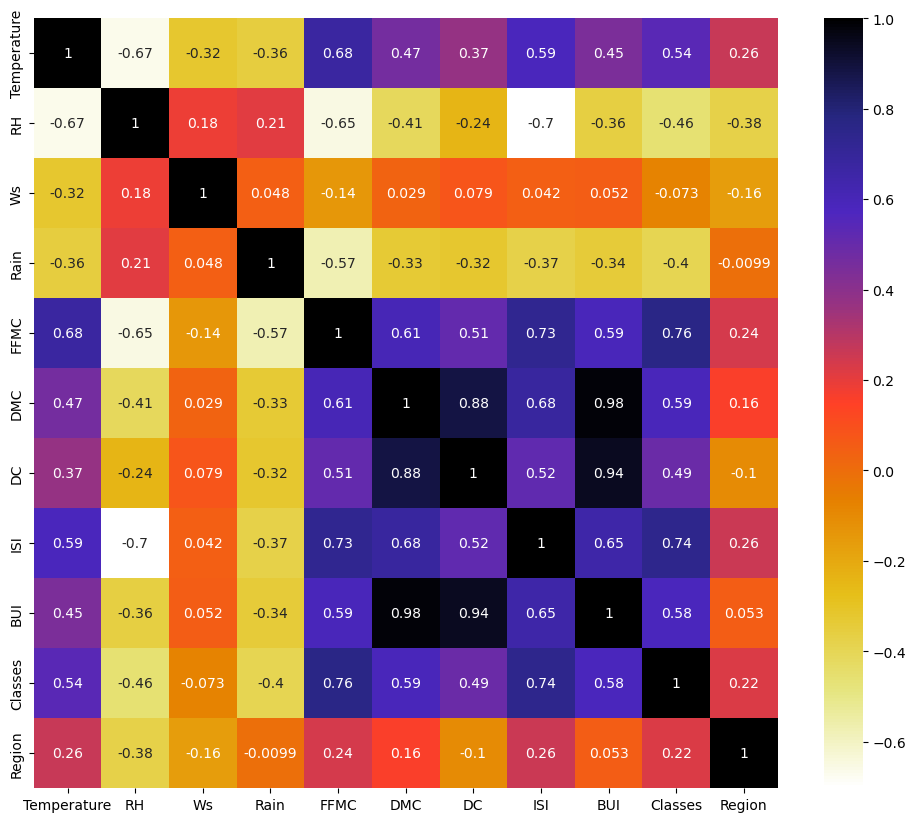

In [44]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [45]:
def correlation(data, threshold):
    cols = set()
    cor_mat = data.corr()
    for i in range(len(cor_mat.columns)):
        for j in range (i):
            if abs(cor_mat.iloc[i,j])>threshold:
                col_name = cor_mat.columns[i]
                cols.add(col_name)
    return cols

In [46]:
cols = correlation(X_train, 0.85)
print(cols)

{'BUI', 'DC'}


In [47]:
## removing the features having correlations more than 0.85
X_train.drop(cols, inplace=True, axis=1)
X_test.drop(cols, inplace=True, axis=1)

In [48]:
X_train.shape, X_test.shape

((170, 9), (73, 9))

In [49]:
Y_train.shape, Y_test.shape

((170,), (73,))

## Feature Scaling or Standarization

In [50]:
from sklearn.preprocessing import StandardScaler

forest_scala = StandardScaler()

In [51]:
X_train_scaled = forest_scala.fit_transform(X_train)
X_train_scaled

array([[ 0.25340604,  0.41764897, -0.95475795, ..., -0.86391562,
        -1.11213403, -1.01183473],
       [ 1.09260784, -0.65102949,  0.1493839 , ...,  1.34763003,
         0.8991722 , -1.01183473],
       [ 0.25340604,  0.35085657, -0.21866339, ...,  0.11106687,
         0.8991722 ,  0.98830369],
       ...,
       [ 0.25340604, -2.4544244 , -0.95475795, ...,  2.25127234,
         0.8991722 ,  0.98830369],
       [-0.58579577,  0.08368695, -0.58671067, ..., -0.60233495,
        -1.11213403,  0.98830369],
       [-1.14526364,  1.08557301, -1.32280523, ..., -0.8163555 ,
        -1.11213403, -1.01183473]])

Text(0.5, 1.0, 'X_train After Scaling')

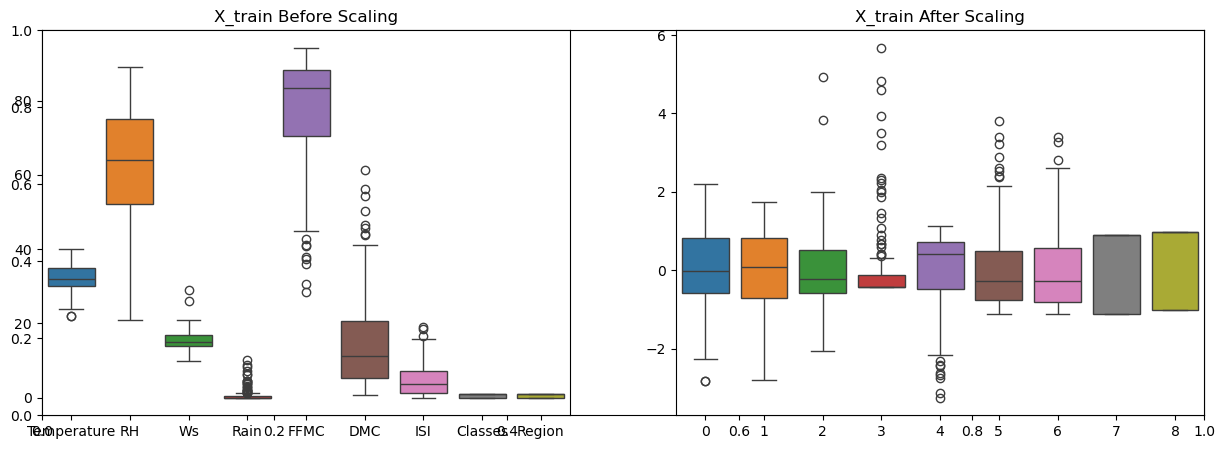

In [52]:
# Box Plot to understand the effect of standard scalar
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

In [53]:
X_test = forest_scala.transform(X_test)
X_test[0:5]

array([[-0.86552971,  0.48444138, -0.58671067, -0.42180373,  0.36685573,
        -0.41343182, -0.36453434,  0.8991722 , -1.01183473],
       [-0.86552971, -0.91819911,  1.25352574, -0.42180373,  0.75388734,
        -0.24278185,  1.03848924,  0.8991722 ,  0.98830369],
       [ 1.09260784, -0.45065228,  0.1493839 , -0.42180373,  0.77390622,
         0.7567394 ,  0.82446869,  0.8991722 ,  0.98830369],
       [-1.70473152,  1.21915782,  1.98962031,  3.0790252 , -1.91529621,
        -0.93350791, -1.03037604, -1.11213403, -1.01183473],
       [-0.86552971,  1.15236542, -0.58671067,  0.78537866, -1.90862325,
        -0.99851742, -1.0541561 , -1.11213403,  0.98830369]])

# Model Selection For Regression

## Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
forest_reg = LinearRegression()

In [55]:
forest_reg.fit(X_train_scaled, Y_train)

LinearRegression()

In [56]:
Y_pred = forest_reg.predict(X_test)
Y_pred

array([ 4.36840253, 10.65915194, 12.96347399,  0.4960402 , -1.0854118 ,
       13.20048118,  3.21824485, 17.02219835,  6.67276557,  1.64229998,
        1.25220997,  7.24677528, 10.56647511, 11.30780292,  6.64271902,
       14.4111659 ,  0.16191578, 20.87915184,  6.09501078,  2.57541846,
        4.87493594,  1.77567139, 14.70041961,  1.07887303,  0.33122518,
        9.48793989,  1.64468232,  1.77540262,  0.86783903,  1.69569949,
        7.85370714,  5.11708364,  3.90179608,  8.3651805 , 16.49068544,
        0.14582359,  1.32238635,  0.55789578, 13.94660354,  1.04906089,
       14.34121618, 10.38217238, 11.42869315,  7.71201476,  9.86740277,
       24.93975892,  0.63917835, 13.88714849, -0.26565532,  2.76993612,
        6.5378903 , 22.86534866,  3.22738075,  8.23719055, -0.46755355,
       25.46455315, 11.87556851,  4.13350897,  0.16038637,  4.89385866,
       11.76920379,  0.46549424,  0.61924743, 17.77351259, 27.11700926,
       -0.57953059,  3.14245765, -0.16182139, 23.16083679,  0.29

In [57]:
## Finding accuracies
from sklearn.metrics import r2_score, mean_absolute_error
mae = mean_absolute_error(Y_test, Y_pred)
score = r2_score(Y_test, Y_pred)

print("Mean Absolut Error : ", mae)
print("Accuracy of the model : ",score)

Mean Absolut Error :  0.6316035972084255
Accuracy of the model :  0.9863998998332776


## Lasso Regresion

In [58]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error

forest_lasso = Lasso()
forest_lasso.fit(X_train_scaled, Y_train)
ls_y_pred = forest_lasso.predict(X_test)
mae = mean_absolute_error(Y_test,ls_y_pred)
score = r2_score(Y_test,ls_y_pred)

print("Mean Absolut Error : ", mae)
print("Accuracy of the model : ",score)

Mean Absolut Error :  1.1781547338046536
Accuracy of the model :  0.9568153393671661


## Ridge Regression 

In [59]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error

forest_ridge = Ridge()
forest_ridge.fit(X_train_scaled, Y_train)
ls_y_pred = forest_ridge.predict(X_test)
mae = mean_absolute_error(Y_test,ls_y_pred)
score = r2_score(Y_test,ls_y_pred)

print("Mean Absolut Error : ", mae)
print("Accuracy of the model : ",score)

Mean Absolut Error :  0.6509503090709584
Accuracy of the model :  0.9857254590484213


## Elasticnet Regression

In [60]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error

forest_elastic = ElasticNet()
forest_elastic.fit(X_train_scaled, Y_train)
ls_y_pred = forest_elastic.predict(X_test)
mae = mean_absolute_error(Y_test,ls_y_pred)
score = r2_score(Y_test,ls_y_pred)

print("Mean Absolut Error : ", mae)
print("Accuracy of the model : ",score)

Mean Absolut Error :  1.8522963271382997
Accuracy of the model :  0.8942766663853519


In [61]:
import pickle

pickle.dump(forest_scala,open('forst-scala.pkl','wb'))
pickle.dump(forest_ridge,open('forst-ridge.pkl','wb'))